In [1]:
import pandas as pd
import numpy as np
import json

In [22]:
with open('dados.json') as f:
    dados = json.load(f)
 

df = pd.json_normalize(data = dados, record_path = ['pessoas'])
df.head()

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,JoÃ£o,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,SÃ£o Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [26]:
df['idade'] = df['idade'].astype(np.int32)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int32 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int32(1), int64(1), object(4)
memory usage: 216.0+ bytes


In [33]:
df.query("`endereco.rua` == ''")

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [32]:
df_filtrado = df.query("`endereco.rua` != ''")
df_filtrado

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,JoÃ£o,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,SÃ£o Paulo


In [35]:
with open('cursos_cadastrados.json') as f:
    dados = json.load(f)
 

df = pd.json_normalize(data = dados)
df

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negÃ³cios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutÃ³rio em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,InteligÃªncia artificial,ProgramaÃ§Ã£o,40 horas,,2022-04-01,,Curso avanÃ§ado sobre inteligÃªncia artificial...,129.9,,contato@emailaleatorio.com,
4,InglÃªs para negÃ³cios,Idiomas,20 horas,30,,,Curso de inglÃªs para negÃ³cios,69.9,John Smith,,
5,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               6 non-null      object
 1   categoria           6 non-null      object
 2   carga_horaria       5 non-null      object
 3   concluintes         5 non-null      object
 4   data_inicio         5 non-null      object
 5   data_conclusao      5 non-null      object
 6   descricao           5 non-null      object
 7   preco               5 non-null      object
 8   instrutor.nome      6 non-null      object
 9   instrutor.email     6 non-null      object
 10  instrutor.telefone  6 non-null      object
dtypes: object(11)
memory usage: 656.0+ bytes


In [38]:
filtro = df.duplicated()

In [39]:
df[filtro]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
5,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [41]:
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [44]:
df.isna().sum()

curso                 0
categoria             0
carga_horaria         1
concluintes           1
data_inicio           1
data_conclusao        1
descricao             1
preco                 1
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [46]:
df[df.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [47]:
df.dropna(inplace=True)

In [49]:
df.isna().sum()

curso                 0
categoria             0
carga_horaria         0
concluintes           0
data_inicio           0
data_conclusao        0
descricao             0
preco                 0
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [50]:
df[df['instrutor.nome' ] == '']

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,InteligÃªncia artificial,ProgramaÃ§Ã£o,40 horas,,2022-04-01,,Curso avanÃ§ado sobre inteligÃªncia artificial...,129.9,,contato@emailaleatorio.com,


In [51]:
df[df['data_conclusao' ] == '']

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,InteligÃªncia artificial,ProgramaÃ§Ã£o,40 horas,,2022-04-01,,Curso avanÃ§ado sobre inteligÃªncia artificial...,129.9,,contato@emailaleatorio.com,
4,InglÃªs para negÃ³cios,Idiomas,20 horas,30,,,Curso de inglÃªs para negÃ³cios,69.9,John Smith,,


In [52]:
df.replace('', pd.NA, inplace=True)

In [53]:
df

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negÃ³cios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutÃ³rio em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,InteligÃªncia artificial,ProgramaÃ§Ã£o,40 horas,<NA>,2022-04-01,<NA>,Curso avanÃ§ado sobre inteligÃªncia artificial...,129.9,<NA>,contato@emailaleatorio.com,<NA>
4,InglÃªs para negÃ³cios,Idiomas,20 horas,30,<NA>,<NA>,Curso de inglÃªs para negÃ³cios,69.9,John Smith,<NA>,<NA>


In [54]:
df.dropna(inplace=True)
df

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negÃ³cios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutÃ³rio em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [56]:
df['concluintes'] = df['concluintes'].astype(int)

df['data_inicio'] = pd.to_datetime(df['data_inicio'])
df['data_conclusao'] = pd.to_datetime(df['data_conclusao'])

df['preco'] = df['preco'].astype(float)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int32         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 184.0+ bytes


In [58]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [59]:
df

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"
5,6,913,2022-01-06,"Nova Iorque, EUA"
6,7,250,2022-01-07,"São Paulo, Brasil"
7,8,400,2022-01-08,"São Paulo, Brasil"
8,9,200,2022-01-09,"São Paulo, Brasil"
9,10,150,2022-01-10,"Rio de Janeiro, Brasil"


In [62]:
import seaborn as sns

<AxesSubplot: xlabel='Valor da transação'>

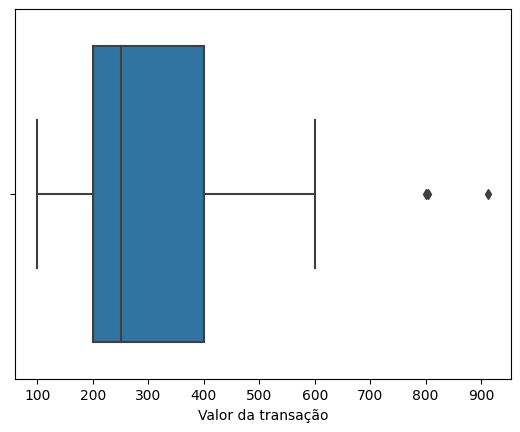

In [63]:
sns.boxplot(x=df['Valor da transação'])

In [66]:
def calc_outliers(column, dataframe):
    Q1 = dataframe[column].quantile(.25)
    Q3 = dataframe[column].quantile(.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR

    outliers = (dataframe[column] < limite_inferior) | (dataframe[column] > limite_superior)
    return outliers

In [68]:
out = calc_outliers('Valor da transação', df)
df[out]

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"
